In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation, metrics

In [2]:
train = pd.read_csv("datasets/train_base.csv")
y = train.target
train.drop(["target","client_id"], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 51 columns):
gender                   170746 non-null int64
age                      170746 non-null int64
credit_sum               170746 non-null float64
credit_month             170746 non-null int64
tariff_id                170746 non-null float64
score_shk                170746 non-null float64
living_region            170746 non-null float64
monthly_income           170746 non-null float64
credit_count             170746 non-null float64
overdue_credit_count     170746 non-null float64
high_edu                 170746 non-null bool
not_work                 170746 non-null bool
usual_workers            170746 non-null bool
head_workers             170746 non-null bool
have_business            170746 non-null bool
single                   170746 non-null bool
target_job_position      170746 non-null float64
target_marital_status    170746 non-null float64
target_education         170746

In [3]:
train_data, test_data, y_train, y_test = train_test_split(train, y, test_size = 0.25, stratify = y)
rf = ensemble.RandomForestClassifier(n_estimators=250, class_weight="balanced", max_features='auto', n_jobs=-1)
rf.fit(train_data, y_train)
preds = rf.predict_proba(test_data)
print(metrics.roc_auc_score(y_test, preds[:,1]))

0.746798309623


In [5]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

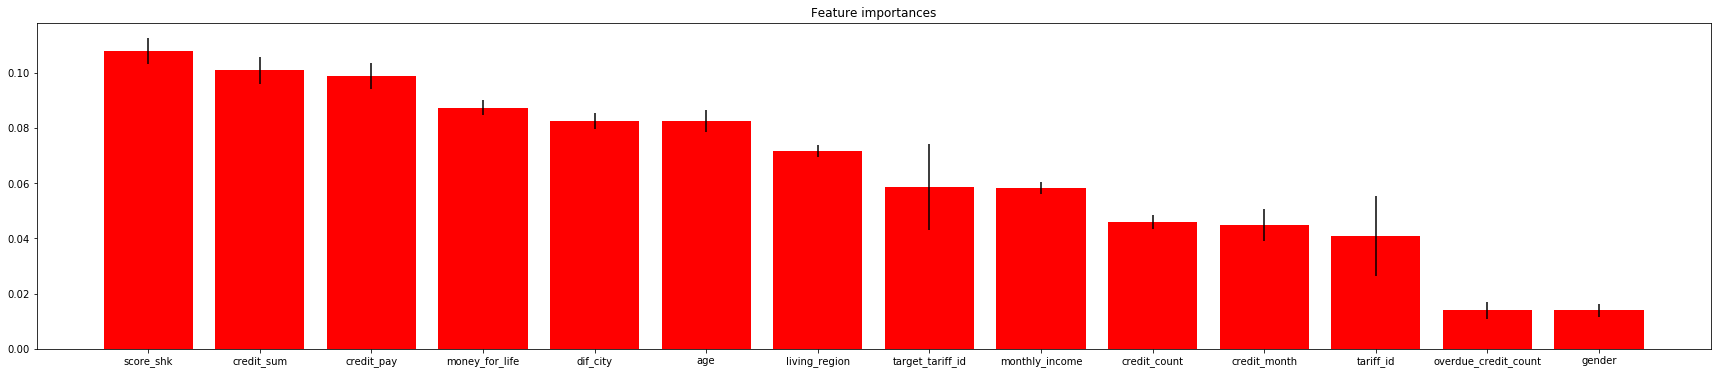

In [6]:
plt.figure(figsize=(30,6))
plt.title("Feature importances")
plt.bar(range(14), importances[indices][:14],
       color="r", yerr=std[indices][:14], align="center")
plt.xticks(range(14), train_data[indices[:14]])
plt.xlim([-1, 14])
plt.show()